# __Final Project:__ K-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
# import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.head(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-09,6825.047363,1024.126221,87.319977,1747.922607,326.664734,1563.359131,5347.636230,1862.806641,1560.907837,929.110596,...,306.528564,906.587708,195.348831,1026.324585,376.821747,1334.140137,9103.182617,174.684845,97.977882,333.384125
2018-07-10,6919.839355,1056.860840,86.643074,1747.922607,311.816345,1563.359131,5816.727051,1890.335815,1501.748169,924.194702,...,308.133453,906.587708,195.348831,1044.489624,376.821747,1347.093018,9103.182617,174.684845,95.399513,333.384125
2018-07-11,6801.349121,1052.184448,85.289276,1747.922607,309.960297,1563.359131,6168.545410,1890.335815,1501.748169,904.530945,...,312.948029,906.587708,197.302322,1089.902344,373.053528,1312.552002,9057.666992,165.490906,97.977882,331.591736
2018-07-12,6659.160645,1047.508057,85.966179,1747.922607,311.816345,1563.359131,6051.272949,1917.864990,1501.748169,924.194702,...,319.367462,906.587708,195.348831,1044.489624,380.589966,1364.363403,9103.182617,165.490906,96.258972,338.761292
2018-07-13,6872.443359,1047.508057,85.966179,1747.922607,311.816345,1563.359131,6074.727051,1881.159424,1497.197266,914.362793,...,317.762604,902.429016,203.162781,1044.489624,384.358185,1351.410522,9103.182617,165.490906,103.134605,338.761292
2018-07-16,6967.235352,1028.802612,85.289276,1756.979126,304.392151,1563.359131,5816.727051,1853.630249,1483.545166,899.615051,...,317.762604,906.587708,199.255814,1044.489624,384.358185,1338.457764,9103.182617,174.684845,101.415703,338.761292
2018-07-17,7038.329590,1028.802612,87.319977,1756.979126,300.680054,1563.359131,5699.454590,1881.159424,1492.646606,904.530945,...,320.972351,889.953064,195.348831,999.077148,384.358185,1321.187256,9103.182617,182.959396,98.837334,351.308014
2018-07-18,6990.933594,921.245972,86.643074,1784.148926,313.672424,1563.359131,6825.272949,1862.806641,1492.646606,938.942444,...,320.972351,910.746399,194.372086,994.535828,386.242279,1321.187256,8943.877930,175.604248,95.399513,347.723236
2018-07-19,6990.933594,953.980591,85.966179,1766.035645,311.816345,1563.359131,5582.181641,1871.983032,1497.197266,953.690247,...,322.577179,910.746399,194.372086,967.288208,386.242279,1334.140137,9103.182617,176.523636,98.837334,344.138458


In [3]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = stock_prices.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = stock_prices.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
cleaned_data

array([[-0.10770453,  0.40511874],
       [ 0.45601807,  0.51432712],
       [ 0.58523063,  0.51415266],
       [ 0.17024488,  0.31367097],
       [-0.04614572,  0.48669575],
       [ 0.20937361,  0.49928076],
       [-0.19887752,  0.62869775],
       [ 0.17031709,  0.43891752],
       [-0.46960962,  0.55165411],
       [ 0.17235989,  0.53285884],
       [-0.18507503,  0.31110657],
       [ 0.19218927,  0.43306901],
       [ 0.69196565,  1.06597851],
       [-0.16638441,  0.45223502],
       [ 0.05452393,  0.28202905],
       [ 0.02008151,  0.3042778 ],
       [ 0.40548456,  0.8028858 ],
       [-0.20780197,  0.32176858],
       [-0.23662923,  0.43878752],
       [ 0.24443771,  0.38994443],
       [ 0.04693301,  0.17253515],
       [ 0.53748184,  0.64522678],
       [ 0.41665018,  0.94665497],
       [-0.14681405,  0.44081373]])

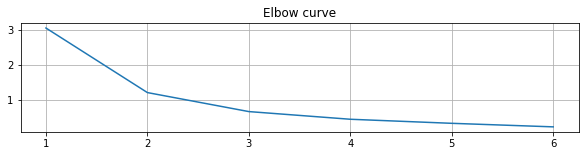

In [13]:
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(1, 7):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(10, 2))
plt.plot(range(1, 7), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [20]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 5

# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(cleaned_data,3)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
 
data = cleaned_data

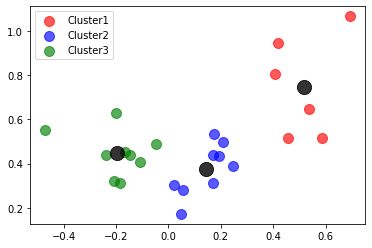

In [21]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='black', alpha = 0.8)
plt.legend()
plt.show()

In [22]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [24]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.sort_values(by='Cluster', ascending=True)

,Stock Symbol,Cluster
16,PGLI,0
1,CEKA,0
2,DMAS,0
21,TPMA,0
12,MFMI,0
22,VINS,0
14,NRCA,1
9,LSIP,1
11,MFIN,1
7,INDS,1


In [25]:
df.to_csv('KMeans_portfolio_clustering.csv', header= True)

In [26]:
df['Cluster'].value_counts()

2    9
1    9
0    6
Name: Cluster, dtype: int64